In [ ]:
#intento de scrapping de paypal con requests
from requests import get, post

# Get Auth & Login URL
get_login = get('https://paypal.com/cgi-bin/webscr?cmd=_login-run')
get_login_response = get_login.text.encode('utf-8')  # printing html source
# printing <Element html at 0x7f19cb242ec0>
get_login_html = lxml.html.fromstring(get_login_response)
# printing [<InputElement 7fb0971e9f18 name='auth' type='hidden'>]
auth = get_login_html.xpath("//input[@name='auth']/@value")
login_url = get_login_html.xpath("//form[@name='login_form']/@action")

# Post Login
payload = {
    'login_cmd': '',
    'login_params': '',
    'login_email': 'websec@spam4.me',
    'login_password': 'jancok666',
    # 'auth':auth[0],
    'submit.x': 'Log In',
    'form_charset': 'UTF-8',
    'browser_name': 'Firefox',
    'browser_version': '18',
    'browser_version_full': '18.0'
}

#proxy
proxy = {
    'https': '1.2.3.4:1234',
    'http': '1.2.3.4:1234'
}
post_login = post(login_url[0], data=payload, proxies=proxy)
post_login_response = post_login.text.encode('utf-8')

print(post_login_response)


In [ ]:
#intento de scrapping de paypal con API

from paypal import PayPalInterface
paypal_api = PayPalInterface(API_USERNAME="xxx_xxx_apix.xxx.com",
                             API_PASSWORD="xxxxxxxxxx",
                             API_SIGNATURE="xxxxxxxxxxxxxxxxxxxxxxxx",
                             DEBUG_LEVEL=0,
                             HTTP_TIMEOUT=30)

transactions = paypal_api._call('TransactionSearch',
                                STARTDATE='2014-01-01T00:00:00Z',
                                STATUS="Success")


In [ ]:
#intento de scrapping de paypal con selenium#

import selenium


In [ ]:
#trying to use beautiful soup on paypal info
from bs4 import BeautifulSoup

with open("paypal_trans.html", encoding="utf-8") as ppt:
    ppt_data = ppt.read()
    soup = BeautifulSoup(ppt_data, "html.parser")
    # print(soup.prettify())
    #this contains all important data of the page but is a lot
    container = soup.find(id="app")
    # print(container.prettify())
    #lets take a smaller container (a child)... sí, esto lo estoy escribiendo yo: saulecast
    container3 = container.find_all(
        "div", class_="ppvx_row___2-7-9")
    print(len(container3))

    ############
    # #encontremos los contenedores de transacciones que pueden usar cryptografia pero la primera parte del nombre de la clase siempre es igual
    # childrens = container3[1].findChildren(recursive=False)
    # # print(childrens)
    # for children in childrens: #just in case there can be more than 1
    #     if "ppvx_col-sm-12___" in str(children["class"]):
    #         # print(children)

    #         # for detail in children: #lo imprime todo en un solo parrafo (tecnicamente 2 pues imprime primero el status y luego todas las trnasacciones en ese status)
    #         #     print(detail.text) #.strip()
    #         #     print("\n")
    ###################
    #         #o; mucha informacion detallada
    #         transaction_details = children.findChildren()
    #         print(len(transaction_details))
    #         for detail in transaction_details:
    #             for deta in detail:
    #                 try:
    #                     print(deta["class"])
    #                 except TypeError:
    #                     print(deta)
    #                 # print(deta)
    #                 # for det in deta:
    #                 #     try:
    #                 #         print(det["class"])
    #                 #     except TypeError:
    #                 #         pass
    #                 # if d["data-cy"] == "counterpartyName":
    #                 #     print(detail.text) #.strip()
    #                 #     print("\n")
    ###########################

    #o; primer intento del codigo, intentaba hacerlo en orden, es deficiente

    # #lets take the relative time and the transactions made in this time
    # rtime = children.find_all(
    #     "div", class_="ppvx_text--body___5-7-9 ogtMz ppvx--v2___5-7-9")
    # print("{0} fechas".format(len(rtime),))

    # for date in rtime:
    #             transaction_containers = children.find_all(
    #             "div", class_="ppvx_tile___2-9-11 ppvx_tile--card___2-9-11 ppvx--v2___2-9-11 ppvx_tile--card--size_xs-long___2-9-11 Cf3Gg")
    #             print("{0} transacciones en: {1}".format(len(transaction_containers),date.text))

    #             for transaction_container in transaction_containers:
    #                 #tomemos los nombres de aquellos con quienes hice la transacción
    #                 results = date.find_all(
    #                     "div", class_="ppvx_text--body-strong___5-7-9 igVr5 ppvx--v2___5-7-9")
    #                 print("{0} coparticipantes".format(len(results),))
    #                 coparticipes = []
    #                 for result in results:
    #                     # print(result.prettify())
    #                     print(result.text) #.strip()
    #                     coparticipes.append(result.text)  # .strip()

    #                 # #tomemos los nombres de aquellos con quienes hice la transacción
    #                 # results = rtime.find_all(
    #                 #     "div", class_="ppvx_text--body-strong___5-7-9 igVr5 ppvx--v2___5-7-9")
    #                 # print("{0} coparticipantes".format(len(results),))
    #                 # coparticipes = []
    #                 # for result in results:
    #                 #     # print(result.prettify())
    #                 #     print(result.text) #.strip()
    #                 #     coparticipes.append(result.text)  # .strip()
    # break


Ejemplos de Plots que simplemente no han sido añadidos

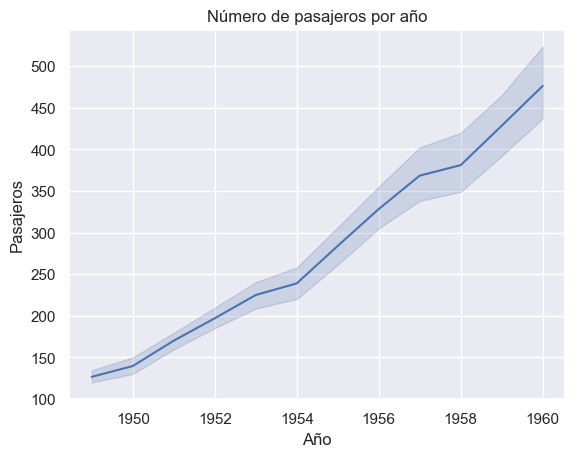

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
datos = sns.load_dataset("flights")

# Crear el gráfico de línea
sns.set(style="darkgrid")
sns.lineplot(x="year", y="passengers", data=datos)

# Agregar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Pasajeros")
plt.title("Número de pasajeros por año")

# Mostrar el gráfico
plt.show()

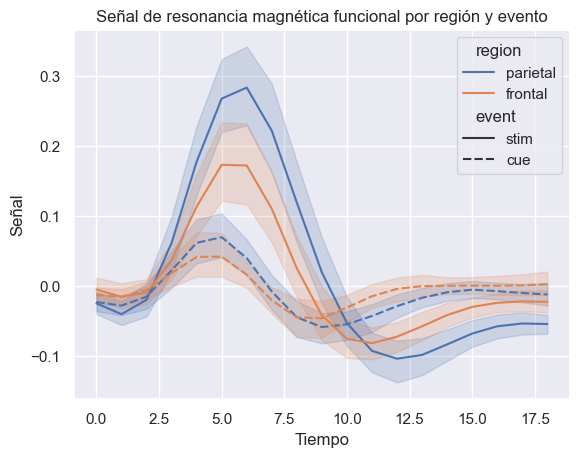

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
datos = sns.load_dataset("fmri")

# Crear el gráfico de línea
sns.set(style="darkgrid")
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=datos)

# Agregar etiquetas y título
plt.xlabel("Tiempo")
plt.ylabel("Señal")
plt.title("Señal de resonancia magnética funcional por región y evento")

# Mostrar el gráfico
plt.show()